In [ ]:
import os
import pandas as pd
from typing import List

corpus: List[str] = []

for fname in os.listdir('imdb'):
    with open(os.path.join('imdb', fname), 'r') as f:
        corpus.append(f.read()); f.close()

print(f'Read {len(corpus)} reviews.')

In [ ]:
df = pd.DataFrame(corpus, columns=['review'])
df.head()

,review
0,This is a great movie for the true romantics a...
1,I saw this film when I was a young child on te...
2,I consider myself a great admirer of David Lyn...
3,Cat Soup at first seems to be a very random an...
4,"Back in 1994, I had a really lengthy vacation ..."


In [ ]:
# save as a csv
df.to_csv('imdb_reviews.csv', index=False)

## Unigrams

In [45]:
import pandas as pd

df = pd.read_csv('imdb_reviews.csv')
df.head()

,review
0,This is a great movie for the true romantics a...
1,I saw this film when I was a young child on te...
2,I consider myself a great admirer of David Lyn...
3,Cat Soup at first seems to be a very random an...
4,"Back in 1994, I had a really lengthy vacation ..."


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

unigram_vectorizer = CountVectorizer(ngram_range=(1,1))
X_unigram = unigram_vectorizer.fit_transform(df['review'])
X_unigram.shape

(12500, 55739)

In [47]:
# words -> frequency mapping
unigram_readable = dict(zip(
    unigram_vectorizer.get_feature_names_out(),
    X_unigram.sum(axis=0).A1
))

len(unigram_readable)

55739

In [48]:
unigram_sorted_by_freq = sorted(unigram_readable.items(), key=lambda x: x[1], reverse=True)
# top 10 unigrams
unigram_sorted_by_freq[:10]

[('the', np.int64(173344)),
 ('and', np.int64(89747)),
 ('of', np.int64(76855)),
 ('to', np.int64(66749)),
 ('is', np.int64(57247)),
 ('in', np.int64(50221)),
 ('br', np.int64(49235)),
 ('it', np.int64(48074)),
 ('that', np.int64(35646)),
 ('this', np.int64(35085))]

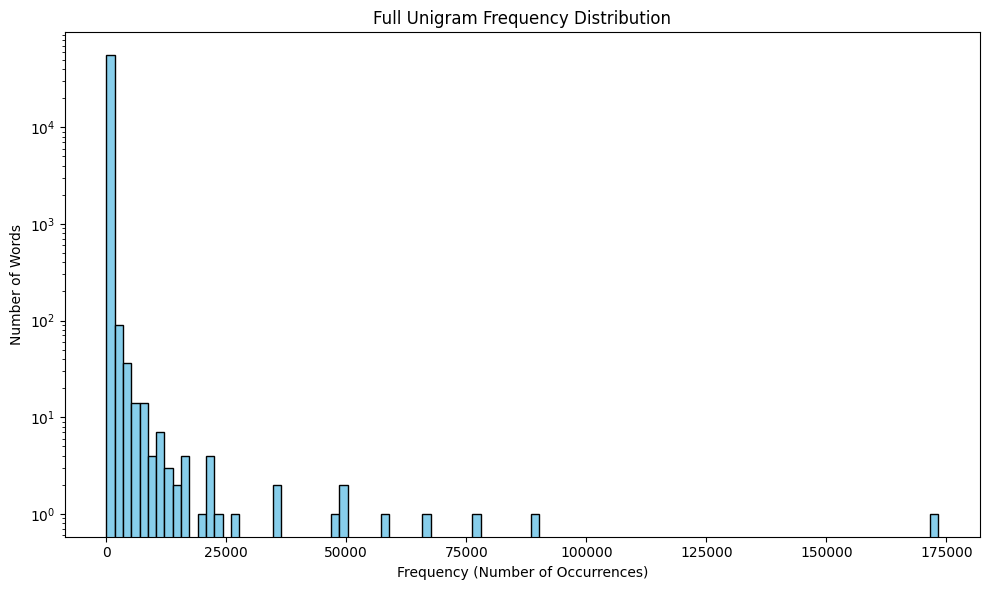

In [49]:
# plot the unigram frequencies
import matplotlib.pyplot as plt

freqs = [freq for word, freq in unigram_sorted_by_freq]

plt.figure(figsize=(10, 6))
plt.hist(freqs, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Frequency (Number of Occurrences)')
plt.ylabel('Number of Words')
plt.title('Full Unigram Frequency Distribution')
plt.yscale('log')
plt.tight_layout()
plt.show()

## Bigrams

In [50]:
bigram_vectorizer = CountVectorizer(ngram_range=(2,2))
X_bigram = bigram_vectorizer.fit_transform(df['review'])
X_bigram.shape

(12500, 868998)

In [51]:
# bigrams -> frequency mapping
bigram_readable = dict(zip(
    bigram_vectorizer.get_feature_names_out(),
    X_bigram.sum(axis=0).A1
))

len(bigram_readable)

868998

In [52]:
bigram_sorted_by_freq = sorted(bigram_readable.items(), key=lambda x: x[1], reverse=True)
# top 10 bigrams
bigram_sorted_by_freq[:10]

[('br br', np.int64(24643)),
 ('of the', np.int64(21304)),
 ('in the', np.int64(12995)),
 ('and the', np.int64(7275)),
 ('the film', np.int64(7261)),
 ('this movie', np.int64(6735)),
 ('to the', np.int64(6559)),
 ('it is', np.int64(5947)),
 ('this film', np.int64(5403)),
 ('the movie', np.int64(5236))]

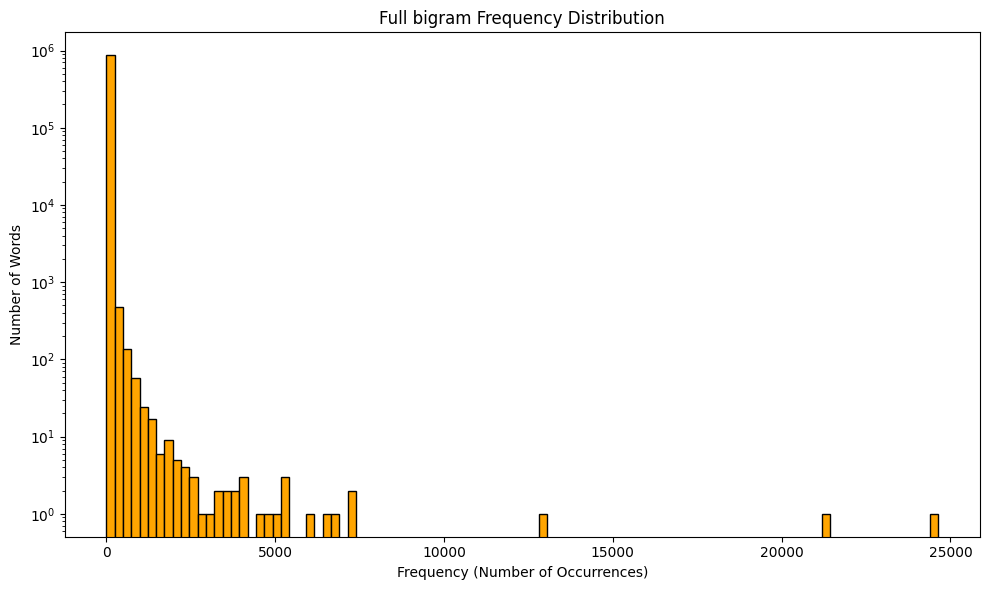

In [53]:
# plot the bigram frequencies
import matplotlib.pyplot as plt

freqs = [freq for word, freq in bigram_sorted_by_freq]

plt.figure(figsize=(10, 6))
plt.hist(freqs, bins=100, color='orange', edgecolor='black')
plt.xlabel('Frequency (Number of Occurrences)')
plt.ylabel('Number of Words')
plt.title('Full bigram Frequency Distribution')
plt.yscale('log')
plt.tight_layout()
plt.show()

## Trigrams

In [54]:
trigram_vectorizer = CountVectorizer(ngram_range=(3,3))
X_trigram = trigram_vectorizer.fit_transform(df['review'])
X_trigram.shape

(12500, 2006029)

In [55]:
# trigrams -> frequency mapping
trigram_readable = dict(zip(
    trigram_vectorizer.get_feature_names_out(),
    X_trigram.sum(axis=0).A1
))

len(trigram_readable)

2006029

In [56]:
trigram_sorted_by_freq = sorted(trigram_readable.items(), key=lambda x: x[1], reverse=True)
# top 10 trigrams
trigram_sorted_by_freq[:10]

[('br br the', np.int64(3857)),
 ('one of the', np.int64(2946)),
 ('of the film', np.int64(1391)),
 ('is one of', np.int64(1177)),
 ('br br this', np.int64(1162)),
 ('this movie is', np.int64(1160)),
 ('the film is', np.int64(1050)),
 ('some of the', np.int64(1042)),
 ('this film is', np.int64(934)),
 ('of the movie', np.int64(889))]

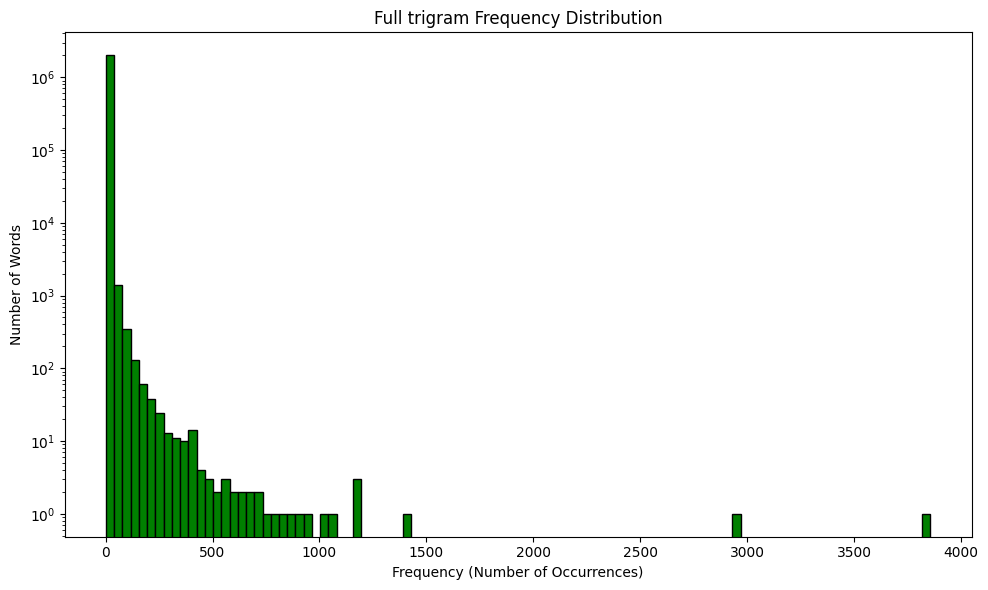

In [57]:
# plot the trigram frequencies
import matplotlib.pyplot as plt

freqs = [freq for word, freq in trigram_sorted_by_freq]

plt.figure(figsize=(10, 6))
plt.hist(freqs, bins=100, color='green', edgecolor='black')
plt.xlabel('Frequency (Number of Occurrences)')
plt.ylabel('Number of Words')
plt.title('Full trigram Frequency Distribution')
plt.yscale('log')
plt.tight_layout()
plt.show()

---